In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
collumns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
targets = {0: 0, 
           1: 1,
           2: 1,
           3: 1,
           4: 1
           }
df_disease = pd.read_csv('./data/cleveland.csv')
df_disease.columns = collumns
df_disease['target'] = df_disease['target'].map(targets)
df_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


## Preproccessing

In [5]:
df_disease['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [7]:
df_disease['ca'] = df_disease['ca'].fillna(df_disease['ca'].mean())
df_disease['thal'] = df_disease['thal'].fillna(df_disease['thal'].mean())

## Data analysis

### distribution of target vs age

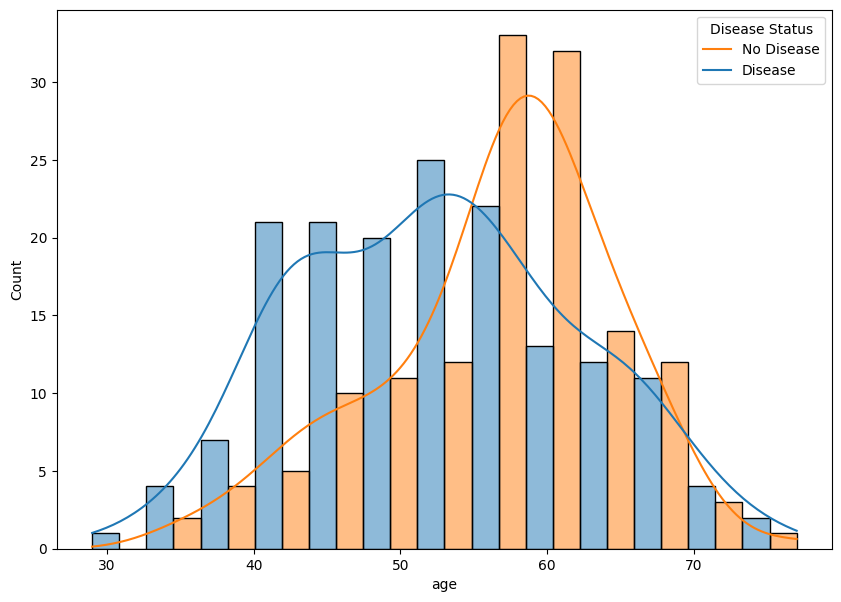

In [8]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_disease, x='age', hue='target', kde=True, multiple="dodge")
plt.legend(title = "Disease Status", labels=['No Disease', 'Disease'])

### catplot age and target
Đồ thị thể hiện mỗi quan hệ giữa độ tuổi và khả năng bị bệnh tim

<Figure size 1000x1000 with 0 Axes>

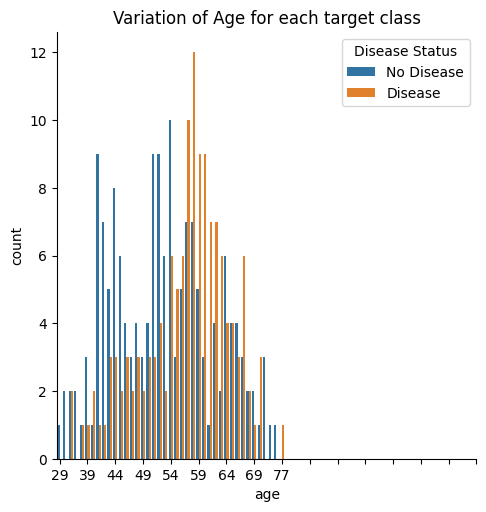

In [9]:
plt.figure(figsize=(10, 10))
sns.catplot(kind="count", data=df_disease, x='age', hue='target', legend=False)
plt.xticks(np.arange(0, 80 , 5))
plt.title('Variation of Age for each target class')
plt.legend(title="Disease Status", labels=['No Disease', 'Disease'])
plt.show()

### barplot of age vs sex with hue = target
Đồ thị thể hiện mỗi quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim

In [10]:
df_disease.loc[(df_disease["sex"] == 0) & (df_disease["target"] == 0)]['age'].mean()

54.55555555555556

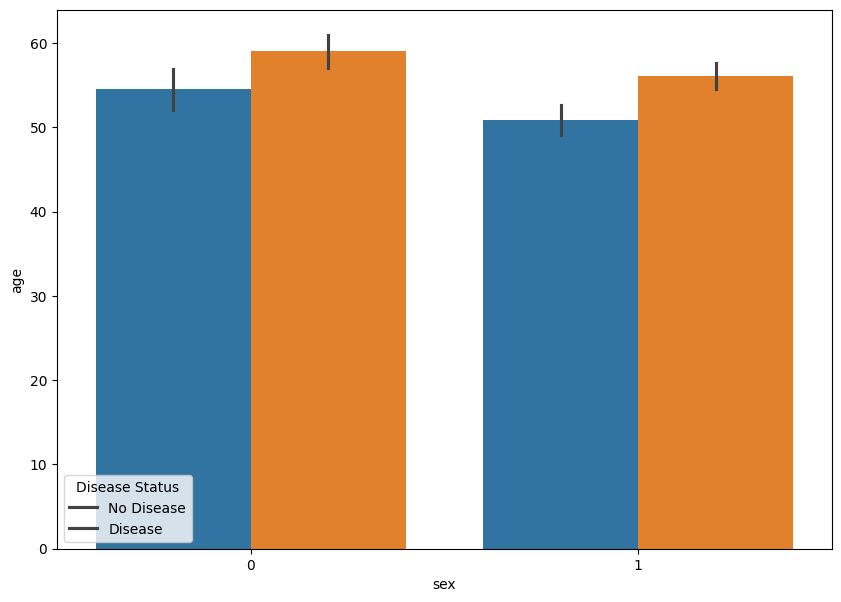

In [11]:
plt.figure(figsize=(10, 7))

# các cột biểu diễn gtri mean từng loại
sns.barplot(data=df_disease, x="sex", y="age", hue="target", legend=False)
plt.legend(title="Disease Status", labels=['No Disease', 'Disease'])
plt.show()

## Using Models 

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

### KNN 

In [13]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



knn_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'))
])

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [15]:
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for KNeighborsClassifier = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.86
Accuracy for test set for KNeighborsClassifier = 0.87


### SVM

In [16]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

svm_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', svm.SVC(kernel="rbf", random_state=42))
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(random_state=42))])

In [18]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for SVM = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for SVM = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for SVM = 0.91
Accuracy for test set for SVM = 0.90


### Naive Bayes

In [19]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

naive_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', BernoulliNB())
])

naive_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', BernoulliNB())])

In [21]:
y_train_pred = naive_clf.predict(X_train)
y_test_pred = naive_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Naive bayes = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Naive bayes = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Naive bayes = 0.83
Accuracy for test set for Naive bayes = 0.84


### Decistion tree

In [22]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

decisiontree_clf = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split=2, random_state=42))
])

decisiontree_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

In [24]:
y_train_pred = decisiontree_clf.predict(X_train)
y_test_pred = decisiontree_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Decision tree = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Decision tree = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Decision tree = 1.00
Accuracy for test set for Decision tree = 0.74


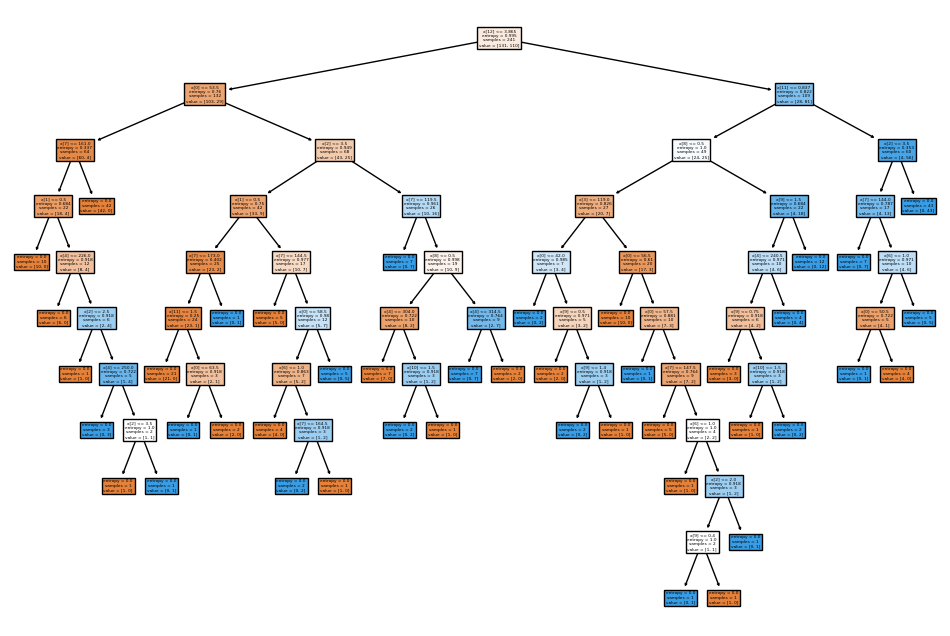

In [25]:
# Trích xuất DecisionTreeClassifier từ pipeline
decision_tree = decisiontree_clf.named_steps['classifier']

# Vẽ cây quyết định
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True)
plt.show()

### Random forest

In [26]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

randomforest_clf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(
        criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42))
])

decisiontree_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

In [28]:
y_train_pred = decisiontree_clf.predict(X_train)
y_test_pred = decisiontree_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Randomforest = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Randomforest = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Randomforest = 1.00
Accuracy for test set for Randomforest = 0.74


### AdaBoost

In [29]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ada_clf = Pipeline(steps=[
    ('classifier', AdaBoostClassifier(n_estimators=10, random_state=42, learning_rate = 1, algorithm="SAMME"))
])

ada_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=1,
                                    n_estimators=10, random_state=42))])

In [31]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for Adaboosting = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for Adaboosting = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for Adaboosting = 0.85
Accuracy for test set for Adaboosting = 0.87


### Gradient boosting

In [32]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

grad_clf = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42))
])

grad_clf.fit(X_train, y_train)

Pipeline(steps=[('classifier', GradientBoostingClassifier(random_state=42))])

In [34]:
y_train_pred = grad_clf.predict(X_train)
y_test_pred = grad_clf.predict(X_test)

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for GradientBoost = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for GradientBoost = {:.2f}'.format(
    accuracy_for_test))

Accuracy for training set for GradientBoost = 0.99
Accuracy for test set for GradientBoost = 0.82


### XGBoost

In [35]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# create model instance
bst = XGBClassifier(n_estimators=100, learning_rate=0.1, objective='binary:logistic', random_state=42, max_depth = 5)
# fit model
bst.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_train_pred = bst.predict(X_train)
y_test_pred = bst.predict(X_test)
y_pred_proba = bst.predict_proba(X_test)[:, 1]

# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_pred_proba)

f1_for_train = f1_score(y_train, y_train_pred)
f1_for_test = f1_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for XGBoost = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for XGBoost = {:.2f}'.format(
    accuracy_for_test))

print(f"AUC Score: {auc}")

print(f"F1 Score for training set: {f1_for_train}")
print(f"F1 Score for test set: {f1_for_test}")

Accuracy for training set for XGBoost = 1.00
Accuracy for test set for XGBoost = 0.84
AUC Score: 0.8954741379310345
F1 Score for training set: 1.0
F1 Score for test set: 0.8275862068965517


### Finetuning XGBOOST

In [38]:
#  dữ liệu kh bị imbalance
counts_y = y.value_counts()
counts_y

target
0    163
1    139
Name: count, dtype: int64

In [39]:
X = df_disease.iloc[:, : -1]
y = df_disease.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_train.values

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [40]:
def modelfit(model : XGBClassifier , dtrain, y_train, useTrainCV = True, cv_folds = 5, early_stopping_rounds = 100):
    if useTrainCV:
        # lấy params trong model
        xgb_params = model.get_xgb_params()
        xg_train = xgb.DMatrix(dtrain.values, label=y_train.values)
        cvresult = xgb.cv(xgb_params, xg_train, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='auc', early_stopping_rounds=early_stopping_rounds)
        # 

        # params được optimize gán vào (số cây lượng cây tìm được tốt nhất khi cv)
        model.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithms on the data 
    model.fit(dtrain, y_train)

    # Predict training set:
    dtrain_predictions = model.predict(dtrain)

    #Print model report:
    print("\nModel Report")
    print(f"Accuracy : {accuracy_score(y_train.values, dtrain_predictions)}")

    feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.975103734439834
n_estimators after finetunning : 37


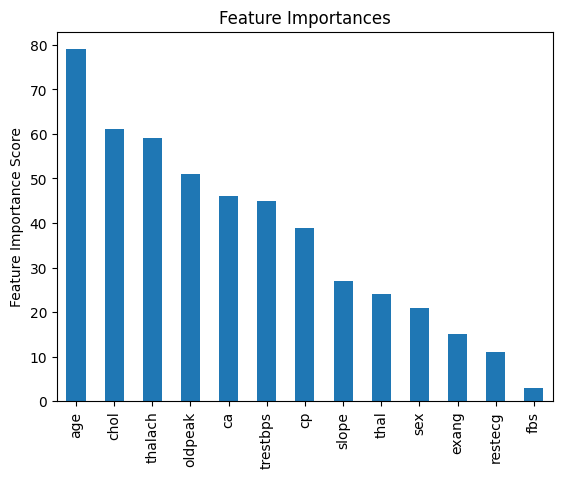

In [41]:
predictors =[x for x in df_disease.columns if x not in ['target']]
xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    # min_child_weight=1, sài khi imbalance
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    # scale_pos_weight=1, sài khi imbalance
    seed=27
)

modelfit(xgb1, X_train, y_train)
print("n_estimators after finetunning :", xgb1.get_params()['n_estimators'])

In [42]:
param_test1 = {
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1] 
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=37, max_depth=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                objective='binary:logistic', nthread=4, seed=27, n_jobs=4),
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.1, 'max_depth': 5}, 0.8927868427868428)

In [43]:
param_test2 = {
    'gamma': [i / 10.0 for i in range(0, 5)]
}
gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=37, max_depth=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                objective='binary:logistic', nthread=4, seed=27, n_jobs=4),
                        param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.8927868427868428)


Model Report
Accuracy : 0.983402489626556
n_estimators after finetunning : 39


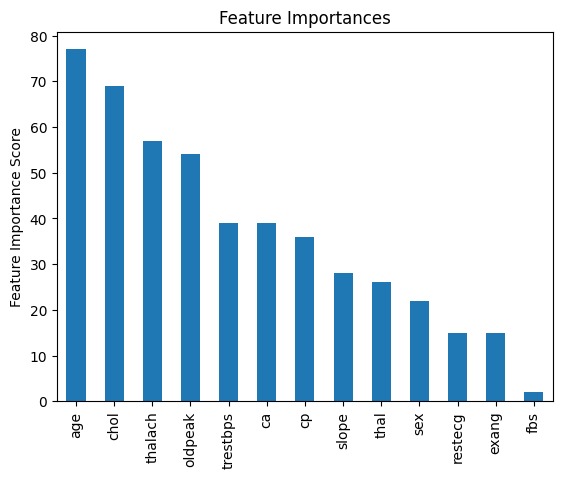

In [44]:
xgb2 = XGBClassifier(
    learning_rate=0.1, n_estimators=1000, max_depth=5, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
    objective='binary:logistic', nthread=4, seed=27, n_jobs=4)
modelfit(xgb2, X_train, y_train)
print("n_estimators after finetunning :", xgb2.get_params()['n_estimators'])

In [45]:
param_test3 = {
    'subsample': [i / 100.0 for i in range(75, 90, 5)],
    'colsample_bytree': [i / 100.0 for i in range(75, 90, 5)]
}
gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=39, max_depth=5, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                                objective='binary:logistic', nthread=4, seed=27, n_jobs=4),
                        param_grid=param_test3, scoring='roc_auc', n_jobs=4, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.85, 'subsample': 0.85}, 0.894030044030044)

In [46]:
param_test4 = {
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}
gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=37, max_depth=5, gamma=0.1, subsample=0.85, colsample_bytree=0.85,
                                                objective='binary:logistic', nthread=4, seed=27, n_jobs=4),
                        param_grid=param_test4, scoring='roc_auc', n_jobs=4, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.05}, 0.8946127946127946)


Model Report
Accuracy : 0.995850622406639
n_estimators after finetunning : 74


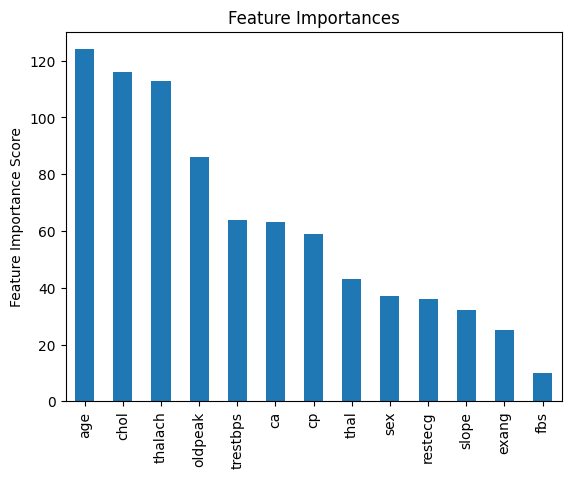

In [47]:
xgb3 = XGBClassifier(
    learning_rate=0.1, n_estimators=1000, max_depth=5, gamma=0.1, subsample=0.85, colsample_bytree=0.85, reg_alpha=0.05,
    objective='binary:logistic', nthread=4, seed=27, n_jobs=4)
modelfit(xgb3, X_train, y_train)
print("n_estimators after finetunning :", xgb3.get_params()['n_estimators'])

In [48]:
best_model = XGBClassifier(
    learning_rate=0.1,  
    max_depth=5,        
    n_estimators=74,  
    gamma=0.1,
    subsample=0.85,
    reg_alpha=0.05,
    colsample_bytree=0.85,
    objective='binary:logistic',
    nthread=4,
    seed=27,
    n_jobs=4
)

# Huấn luyện mô hình với tập huấn luyện
best_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Tính toán accuracy và AUC
# Tính toán độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = accuracy_score(y_train, y_train_pred)
accuracy_for_test = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_pred_proba)

f1_for_train = f1_score(y_train, y_train_pred)
f1_for_test = f1_score(y_test, y_test_pred)

# In kết quả
print('Accuracy for training set for XGBoost after fine tunning = {:.2f}'.format(
    accuracy_for_train))
print('Accuracy for test set for XGBoost fine tunning = {:.2f}'.format(
    accuracy_for_test))

print(f"AUC Score: {auc}")

print(f"F1 Score for training set: {f1_for_train}")
print(f"F1 Score for test set: {f1_for_test}")

Accuracy for training set for XGBoost after fine tunning = 1.00
Accuracy for test set for XGBoost fine tunning = 0.85
AUC Score: 0.896551724137931
F1 Score for training set: 0.9954337899543378
F1 Score for test set: 0.8524590163934426


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

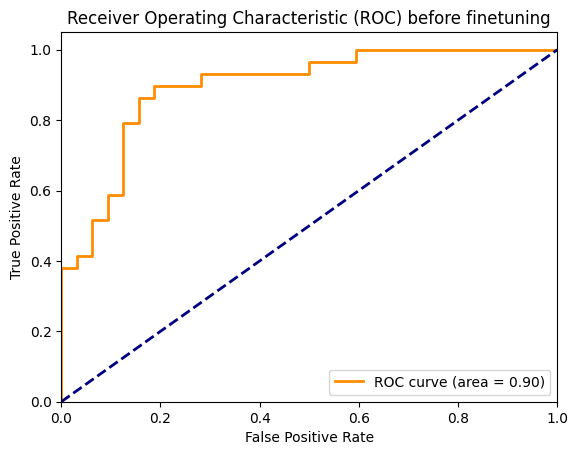

In [53]:
y_pred_proba = bst.predict_proba(X_test)[:, 1]
# Tính toán FPR (False Positive Rate) và TPR (True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Đường y=x
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) before finetuning')
plt.legend(loc="lower right")
plt.show()

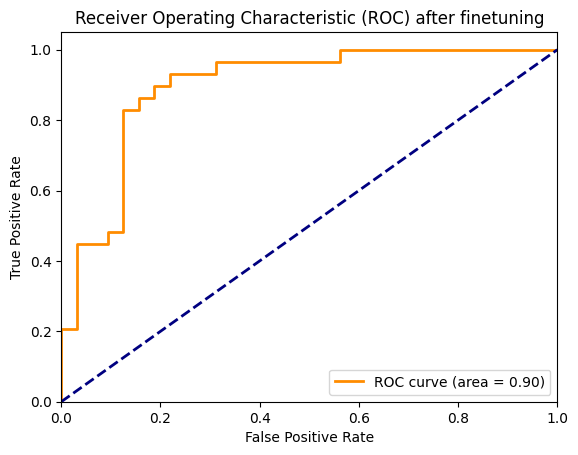

In [54]:
# Dự đoán xác suất cho tập kiểm tra
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Tính toán FPR (False Positive Rate) và TPR (True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Đường y=x
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after finetuning')
plt.legend(loc="lower right")
plt.show()